<a href="https://colab.research.google.com/github/DyaneshR/Medicinal-Plant-Classification/blob/main/Medplant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import os

# Load VGG16 model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define your image data generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load dataset
dataset_path = '/content/drive/MyDrive/Data/D2'
data_gen = datagen.flow_from_directory(dataset_path,
                                       target_size=(224, 224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=False)

# Extract features
features = base_model.predict(data_gen)
labels = data_gen.classes

# Save extracted features and labels
np.save('features.npy', features)
np.save('labels.npy', labels)


Found 2168 images belonging to 4 classes.
68/68 [==============================] - 1313s 19s/step


Accuracy: 0.9953917050691244
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       150
           3       0.98      0.98      0.98        58

    accuracy                           1.00       434
   macro avg       0.99      0.99      0.99       434
weighted avg       1.00      1.00      1.00       434

1/1 [==============================] - 1s 947ms/step
Your plant is Curry with 97.14% accuracy. Usage: help lower blood glucose levels and it is rich in antioxidants.


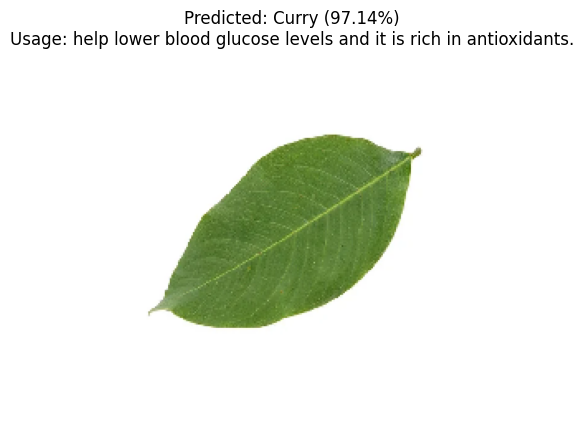

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load extracted features and labels
features = np.load('features.npy')
labels = np.load('labels.npy')

# Flatten features for SVM
n_samples = features.shape[0]
flattened_features = features.reshape(n_samples, -1)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flattened_features, labels, test_size=0.2, random_state=42)

# Train SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# List of tuples containing plant names and their usages
output_class = [
    ("aloe vera", "Used for skin care, treating burns and promotes wound healing."),
    ("curry leaf", "help lower blood glucose levels and it is rich in antioxidants."),
    ("neem", "Used for its antibacterial and antifungal properties"),
    ("tulsi", "Used in herbal remedies and religious practices, promotes stress releif.")
]

def plant_prediction(new_image):
    img = load_img(new_image, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using VGG16
    features = base_model.predict(img_array)
    features = features.flatten().reshape(1, -1)

    # Predict using SVM
    predicted_array = svm_model.predict_proba(features)[0]
    predicted_index = np.argmax(predicted_array)
    predicted_value = list(data_gen.class_indices.keys())[predicted_index]
    predicted_usage = output_class[predicted_index][1]
    predicted_accuracy = round(predicted_array[predicted_index] * 100, 2)

    print(f"Your plant is {predicted_value} with {predicted_accuracy}% accuracy. Usage: {predicted_usage}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_value} ({predicted_accuracy}%)\nUsage: {predicted_usage}")
    plt.show()

plant_prediction("/content/drive/MyDrive/Data/c1.jpg")


Accuracy: 0.9953917050691244
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       150
           3       0.98      0.98      0.98        58

    accuracy                           1.00       434
   macro avg       0.99      0.99      0.99       434
weighted avg       1.00      1.00      1.00       434

1/1 [==============================] - 1s 586ms/step
Your plant is Aloevera with 98.85% accuracy. Usage: Used for skin care, treating burns and promotes wound healing.


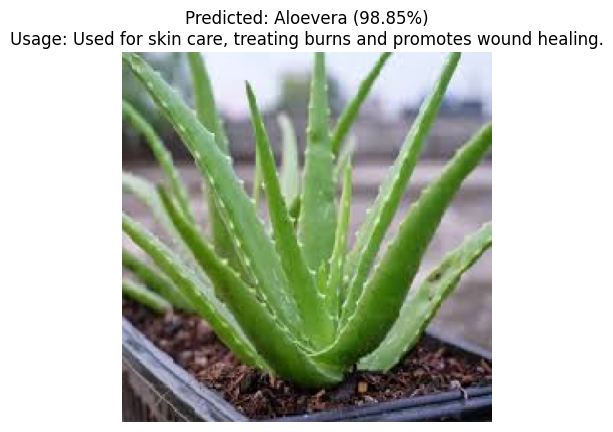

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load extracted features and labels
features = np.load('features.npy')
labels = np.load('labels.npy')

# Flatten features for SVM
n_samples = features.shape[0]
flattened_features = features.reshape(n_samples, -1)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flattened_features, labels, test_size=0.2, random_state=42)

# Train SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# List of tuples containing plant names and their usages
output_class = [
    ("aloe vera", "Used for skin care, treating burns and promotes wound healing."),
    ("curry leaf", "help lower blood glucose levels and it is rich in antioxidants."),
    ("neem", "Used for its antibacterial and antifungal properties"),
    ("tulsi", "Used in herbal remedies and religious practices, promotes stress releif.")
]

def plant_prediction(new_image):
    img = load_img(new_image, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using VGG16
    features = base_model.predict(img_array)
    features = features.flatten().reshape(1, -1)

    # Predict using SVM
    predicted_array = svm_model.predict_proba(features)[0]
    predicted_index = np.argmax(predicted_array)
    predicted_value = list(data_gen.class_indices.keys())[predicted_index]
    predicted_usage = output_class[predicted_index][1]
    predicted_accuracy = round(predicted_array[predicted_index] * 100, 2)

    print(f"Your plant is {predicted_value} with {predicted_accuracy}% accuracy. Usage: {predicted_usage}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_value} ({predicted_accuracy}%)\nUsage: {predicted_usage}")
    plt.show()

plant_prediction("/content/drive/MyDrive/Data/a1.jpeg")


Accuracy: 0.9953917050691244
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       150
           3       0.98      0.98      0.98        58

    accuracy                           1.00       434
   macro avg       0.99      0.99      0.99       434
weighted avg       1.00      1.00      1.00       434

1/1 [==============================] - 1s 554ms/step
Your plant is Neem with 64.52% accuracy. Usage: Used for its antibacterial and antifungal properties


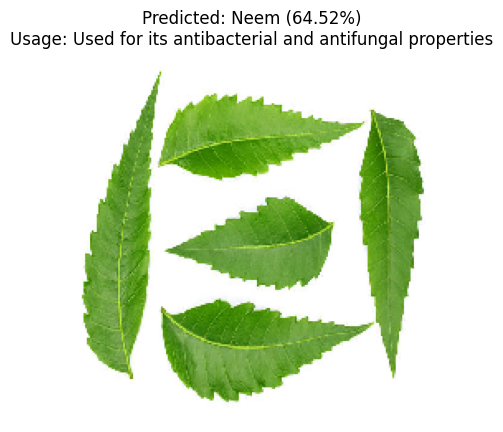

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load extracted features and labels
features = np.load('features.npy')
labels = np.load('labels.npy')

# Flatten features for SVM
n_samples = features.shape[0]
flattened_features = features.reshape(n_samples, -1)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flattened_features, labels, test_size=0.2, random_state=42)

# Train SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# List of tuples containing plant names and their usages
output_class = [
    ("aloe vera", "Used for skin care, treating burns and promotes wound healing."),
    ("curry leaf", "help lower blood glucose levels and it is rich in antioxidants."),
    ("neem", "Used for its antibacterial and antifungal properties"),
    ("tulsi", "Used in herbal remedies and religious practices, promotes stress releif.")
]

def plant_prediction(new_image):
    img = load_img(new_image, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using VGG16
    features = base_model.predict(img_array)
    features = features.flatten().reshape(1, -1)

    # Predict using SVM
    predicted_array = svm_model.predict_proba(features)[0]
    predicted_index = np.argmax(predicted_array)
    predicted_value = list(data_gen.class_indices.keys())[predicted_index]
    predicted_usage = output_class[predicted_index][1]
    predicted_accuracy = round(predicted_array[predicted_index] * 100, 2)

    print(f"Your plant is {predicted_value} with {predicted_accuracy}% accuracy. Usage: {predicted_usage}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_value} ({predicted_accuracy}%)\nUsage: {predicted_usage}")
    plt.show()

plant_prediction("/content/drive/MyDrive/Data/n1.jpg")


Accuracy: 0.9953917050691244
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       1.00      1.00      1.00       119
           2       1.00      1.00      1.00       150
           3       0.98      0.98      0.98        58

    accuracy                           1.00       434
   macro avg       0.99      0.99      0.99       434
weighted avg       1.00      1.00      1.00       434

1/1 [==============================] - 1s 526ms/step
Your plant is Tulsi with 100.0% accuracy. Usage: Used in herbal remedies and religious practices, promotes stress releif.


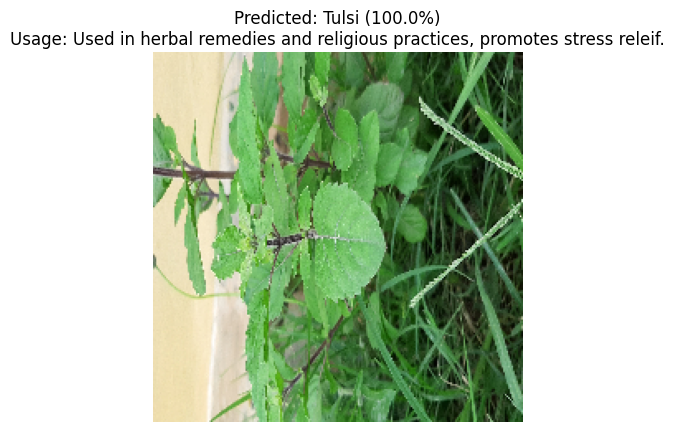

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load extracted features and labels
features = np.load('features.npy')
labels = np.load('labels.npy')

# Flatten features for SVM
n_samples = features.shape[0]
flattened_features = features.reshape(n_samples, -1)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flattened_features, labels, test_size=0.2, random_state=42)

# Train SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# List of tuples containing plant names and their usages
output_class = [
    ("aloe vera", "Used for skin care, treating burns and promotes wound healing."),
    ("curry leaf", "help lower blood glucose levels and it is rich in antioxidants."),
    ("neem", "Used for its antibacterial and antifungal properties"),
    ("tulsi", "Used in herbal remedies and religious practices, promotes stress releif.")
]

def plant_prediction(new_image):
    img = load_img(new_image, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using VGG16
    features = base_model.predict(img_array)
    features = features.flatten().reshape(1, -1)

    # Predict using SVM
    predicted_array = svm_model.predict_proba(features)[0]
    predicted_index = np.argmax(predicted_array)
    predicted_value = list(data_gen.class_indices.keys())[predicted_index]
    predicted_usage = output_class[predicted_index][1]
    predicted_accuracy = round(predicted_array[predicted_index] * 100, 2)

    print(f"Your plant is {predicted_value} with {predicted_accuracy}% accuracy. Usage: {predicted_usage}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_value} ({predicted_accuracy}%)\nUsage: {predicted_usage}")
    plt.show()


plant_prediction("/content/drive/MyDrive/Data/t1.jpg")
